In [1]:
import scipy
from scipy import stats
import scipy.integrate as spi
import numpy as np
import pylab as pl
import pandas as pd
import math
import xlrd
import sys
import time

%matplotlib inline

def siModel(t):
    i = N * math.pow(math.e, N*t)/(N-1+math.pow(math.e, N*t))

In [2]:
filename = 'Italy_infected.xlsx'
book = xlrd.open_workbook(filename)
print('Source file: ' + sys.path[0] + filename + ' loaded!')

#Extraction
nsheets = book.nsheets

sheet_names = book.sheet_names()
sheets = {}

for sheet_name in sheet_names:    
    nrows = book.sheet_by_name(sheet_name).nrows
    current_header = book.sheet_by_name(sheet_name).row_values(0) 
    current_data = [book.sheet_by_name(sheet_name).row_values(i) for i in range(1, nrows)]
    sheets[sheet_name] = pd.DataFrame(current_data, columns = current_header)   #DataFrame Construction
#Feedback
print('Data Extracted!')

Source file: I:\Chuan\Documents\GitHub\Research\SEIRItaly_infected.xlsx loaded!
Data Extracted!


In [3]:
sheets['Sheet2']

,Italy,infected,recovered,death,,
0,43881.0,3.0,0.0,1.0,,1.0
1,43882.0,20.0,0.0,1.0,,1.0
2,43883.0,62.0,1.0,2.0,,3.0
3,43884.0,155.0,2.0,3.0,,5.0
4,43885.0,229.0,1.0,7.0,,8.0
5,43886.0,322.0,1.0,10.0,,11.0
6,43887.0,453.0,3.0,12.0,,15.0
7,43888.0,655.0,45.0,17.0,,62.0
8,43889.0,888.0,46.0,21.0,,67.0
9,43890.0,1128.0,46.0,29.0,,75.0


In [4]:
infected_observed = sheets['Sheet2']['infected']

In [5]:
removed_observed = sheets['Sheet2']['recovered'] + sheets['Sheet2']['death'] 

In [6]:
len(removed_observed)

25

## Iteratible SIR Model

In [7]:
t_start = 0.0
t_end = 26       # Transmit Time

N = 6 * math.pow(10,6)
R0 = 0
I0 = 3      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint

t_range = np.arange(t_start, t_end)

RES[1:, 2]

beta = 1.2
gamma = 1.2

RES = spi.odeint(model_SIR, INPUT, t_range) 

fitness_infected = stats.chisquare(infected_observed, RES[1:, 1])

print(fitness_infected)

removed_observed

stats.chisquare(removed_observed, RES[1:, 2])


## Interation

In [8]:
start = time.time()

minimum_infected = math.pow(10,10)
minimum_removed = math.pow(10,10)

for beta in np.arange(0.1, 15.0, 0.01):
    for gamma in np.arange(0.1, 15.0, 0.01):
        RES = spi.odeint(model_SIR, INPUT, t_range) 
        
        # Goodness Test of Fitness
        
        #print(RES)
        
        fitness_infected = stats.chisquare(infected_observed, RES[1:, 1])
        fitness_removed = stats.chisquare(removed_observed, RES[1:, 2])
        
       
        if fitness_infected[0] < 10000 and fitness_infected[0] > 0 and fitness_removed[0] < 10000 and fitness_removed[0] > 0:
            print('beta=', beta, '  gamma=', gamma, fitness_infected, fitness_removed)
        
        
        #print('beta=', beta, '  gamma=', gamma, fitness_infected, fitness_removed)
            
        if fitness_infected[0] < minimum_infected and fitness_infected[0]> -minimum_infected and fitness_removed[0] < minimum_removed and fitness_removed[0]> -minimum_removed:
            minimum_infected = fitness_infected[0]
            minimum_removed = fitness_removed[0]
            beta_mini = beta
            gamma_mini = gamma
            
end = time.time()
duration = end - start
            
print('The minimum_infected Z is ', minimum_infected)
print('The minimum_removed Z is ', minimum_removed)
print('when beta is ', beta_mini)
print('when gamma is ', gamma_mini)

print('Time: ', duration)

The minimum_infected Z is  197383.37411121264
The minimum_removed Z is  5854.542566958157
when beta is  0.45999999999999985
when gamma is  0.1
Time:  3721.0083010196686


In [9]:
print('The minimum_infected Z is ', minimum_infected)
print('The minimum_removed Z is ', minimum_removed)
print('when beta is ', beta_mini)
print('when gamma is ', gamma_mini)

The minimum_infected Z is  197383.37411121264
The minimum_removed Z is  5854.542566958157
when beta is  0.45999999999999985
when gamma is  0.1


Text(0, 0.5, 'Infectious and Recovereds')

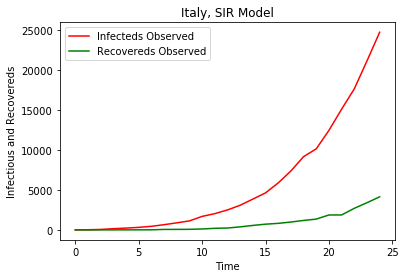

In [10]:
#Ploting
pl.plot(infected_observed, '-r', label='Infecteds Observed')
pl.plot(removed_observed, '-g', label='Recovereds Observed')

pl.legend(loc=0)
pl.title('Italy, SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')

## SIR Validation

In [11]:
beta = 0.46
gamma = 0.1

t_start = 0.0
t_end = 50      # Transmit Time

N = 6*math.pow(10,6)
R0 = 0
I0 = 3      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

In [12]:
def model_SIR(INP,t):  
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint


In [13]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SIR, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

Text(0, 0.5, 'Infectious and Recovereds')

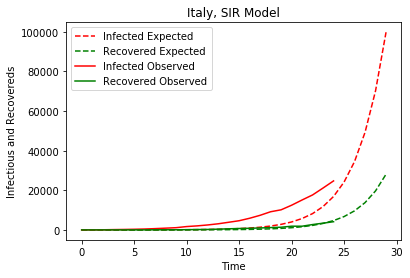

In [14]:
#Ploting
day = 30
pl.plot(RES[:day,1], '--r', label='Infected Expected')
pl.plot(RES[:day,2], '--g', label='Recovered Expected')
pl.plot(infected_observed[:day], '-r', label='Infected Observed')
pl.plot(removed_observed[:day], '-g', label='Recovered Observed')

pl.legend(loc=0)
pl.title('Italy, SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')

Text(0, 0.5, 'Infectious and Recovereds')

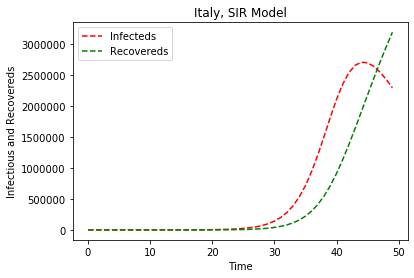

In [15]:
#Ploting
pl.plot(RES[:,1], '--r', label='Infecteds')
pl.plot(RES[:,2], '--g', label='Recovereds')

pl.legend(loc=0)
pl.title('Italy, SIR Model')
pl.xlabel('Time')
pl.ylabel('Infectious and Recovereds')